<a href="https://colab.research.google.com/github/wesleybeckner/python_foundations/blob/main/notebooks/labs/L5_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Foundations, Lab 5: Practice Visualization

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com<br>

---

<br>

In this lab we will make some nifty data visualizations!

<br>

---




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression

## 📊 L5 Q1 

Create a bar plot of the following pokemon with their healthpoints

<BarContainer object of 4 artists>

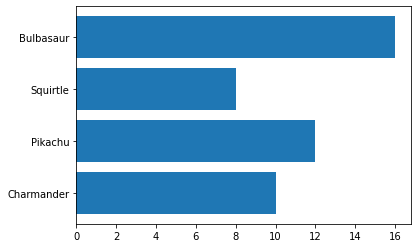

In [3]:
pokemon = ['Charmander', 'Pikachu', 'Squirtle', 'Bulbasaur']
hp = [10, 12, 8, 16]

plt.barh(pokemon, hp)

## 📊 L5 Q2

Create the same bar plot with error bars using the provided list `variance`

<BarContainer object of 4 artists>

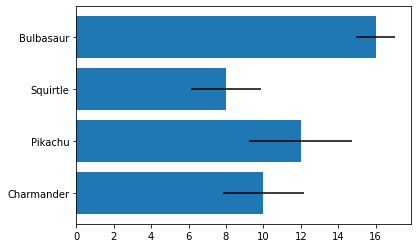

In [4]:
np.random.seed(1)
pokemon = ['Charmander', 'Pikachu', 'Squirtle', 'Bulbasaur']
hp = [10, 12, 8, 16]
variance = [i * random.random()*.25 for i in hp]

plt.barh(pokemon, hp, xerr=variance)

## 📊 L5 Q3

You have worker shift performance data. Each `shift` list contains 10 samples of how many kilograms of product were produced in a shift. Create a boxplot of this worker data. Each shift should be a separate block


{'whiskers': [<matplotlib.lines.Line2D at 0x7f028b025ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f028afb1280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f028b0259d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f028afb1820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f028afb1af0>],
 'means': []}

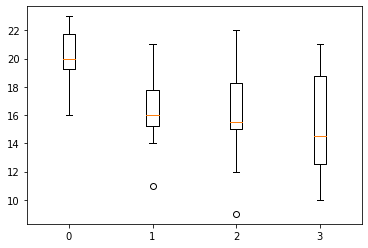

In [6]:
np.random.seed(7)
shift_one = [round(i) for i in np.random.normal(16, 3, 10)]
shift_two = [round(i) for i in np.random.normal(21, 3, 10)]
shift_three = [round(i) for i in np.random.normal(16, 3, 10)]
shift_four = [round(i) for i in np.random.normal(16, 3, 10)]

fig, ax = plt.subplots()
ax.boxplot(shift_one, positions=[1])
ax.boxplot(shift_two, positions=[0])
ax.boxplot(shift_three, positions=[2])
ax.boxplot(shift_four, positions=[3])

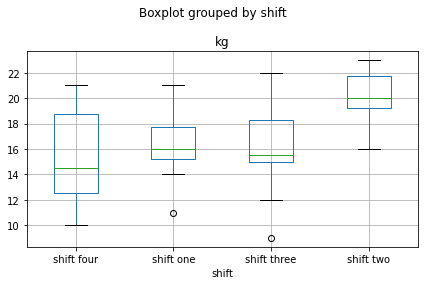

In [80]:
df = pd.DataFrame([shift_one, shift_two, shift_three, shift_four]).T 
df.columns = ['shift one', 'shift two', 'shift three', 'shift four']
df = df.melt(var_name = 'shift', value_name = 'kg')
df.boxplot(by='shift', column='kg')
plt.tight_layout()

## 📊 L5 Q4 

Create a scatter plot of x vs y

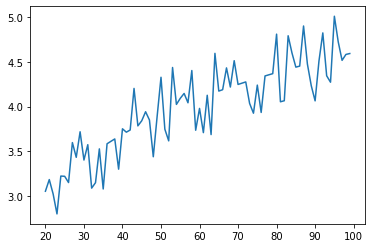

In [15]:
# we can throttle the error rate
err = .5
random.seed(42)

# our data has a KNOWN underlying functional form (log(x))
def func(x, err):
    return np.log(x) + err * random.randint(-1,1) * random.random()
x = np.arange(20,100)
y = [func(t, err) for t in x]

plt.plot(x, y)

## 📊 L5 Q5

Compute the mean and standard deviation of weights grouped by fruit then display the result as a bar chart with error bars


In [51]:
fruit = pd.Series(np.random.choice(['apple', 'banana', 'carrot'], 10))
weights = pd.Series(np.linspace(1, 10, 10))
print(weights.tolist())
print(fruit.tolist())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
['carrot', 'carrot', 'banana', 'carrot', 'apple', 'apple', 'banana', 'apple', 'apple', 'banana']


<AxesSubplot:xlabel='Fruit'>

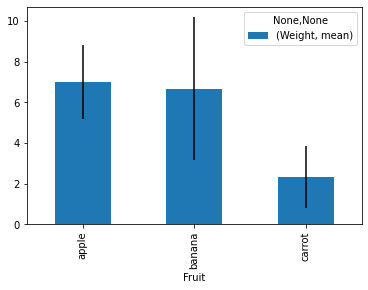

In [77]:
df = pd.DataFrame({'Fruit': fruit, 'Weight': weights})
df2 = df.groupby('Fruit').agg(['mean', 'std'])
df2.plot(kind='bar', y=('Weight', 'mean'), yerr=df2['Weight', 'std'].values)

## 📊 L5 Q6

Make a scatter plot of `X_train` vs `y_train`. On the same plot, add a dotted line representation of the linear model estimated from `X_train` and `y_train` (you can use `X_seq` and `y_seq` to do this)

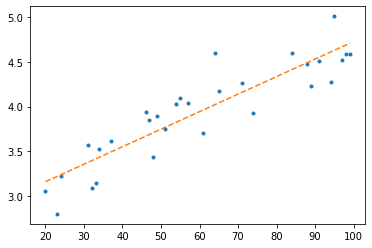

In [79]:
random.seed(42)

X_train = random.sample(list(x), 30)
indices = [list(x).index(i) for i in X_train]
y_train = [y[i] for i in indices]

# solve the slope and intercept of our 1-degree polynomial ;)
model = LinearRegression()
model.fit(np.array(X_train).reshape(-1,1), y_train)

# create some x data to plot our functions
X_seq = np.linspace(min(X_train),max(X_train),300).reshape(-1,1)
y_seq = model.predict(X_seq)

fig, ax = plt.subplots()
ax.plot(X_train, y_train, ls='', marker='.')
ax.plot(X_seq, y_seq, ls='--')